In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
sb.set()
from dython import nominal
from dython import nominal

In [2]:
data = pd.read_csv('model_dat.csv')

In [3]:
data

,Brand,Year,Horsepower,Engine Cylinders,Number of Doors,Price
0,BMW,2011,335,6,2,46135
1,BMW,2011,300,6,2,40650
2,BMW,2011,300,6,2,36350
3,BMW,2011,230,6,2,29450
4,BMW,2011,230,6,2,34500
...,...,...,...,...,...,...
9841,Acura,2012,300,6,4,46120
9842,Acura,2012,300,6,4,56670
9843,Acura,2012,300,6,4,50620
9844,Acura,2013,300,6,4,50920


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9846 entries, 0 to 9845
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Brand             9846 non-null   object
 1   Year              9846 non-null   int64 
 2   Horsepower        9846 non-null   int64 
 3   Engine Cylinders  9846 non-null   int64 
 4   Number of Doors   9846 non-null   int64 
 5   Price             9846 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 461.7+ KB


In [5]:
# Treating all the nominal variables at once using dummy variables
MLDATA=pd.get_dummies(data)

# Printing sample rows
MLDATA

,Year,Horsepower,Engine Cylinders,Number of Doors,Price,Brand_Acura,Brand_Alfa Romeo,Brand_Audi,Brand_BMW,Brand_Buick,...,Brand_Plymouth,Brand_Pontiac,Brand_Porsche,Brand_Saab,Brand_Scion,Brand_Subaru,Brand_Suzuki,Brand_Toyota,Brand_Volkswagen,Brand_Volvo
0,2011,335,6,2,46135,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2011,300,6,2,40650,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2011,300,6,2,36350,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2011,230,6,2,29450,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2011,230,6,2,34500,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9841,2012,300,6,4,46120,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9842,2012,300,6,4,56670,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9843,2012,300,6,4,50620,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9844,2013,300,6,4,50920,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Printing all the column names for our reference
MLDATA.columns

Index(['Year', 'Horsepower', 'Engine Cylinders', 'Number of Doors', 'Price',
       'Brand_Acura', 'Brand_Alfa Romeo', 'Brand_Audi', 'Brand_BMW',
       'Brand_Buick', 'Brand_Cadillac', 'Brand_Chevrolet', 'Brand_Chrysler',
       'Brand_Dodge', 'Brand_FIAT', 'Brand_Ford', 'Brand_GMC', 'Brand_Genesis',
       'Brand_HUMMER', 'Brand_Honda', 'Brand_Hyundai', 'Brand_Infiniti',
       'Brand_Kia', 'Brand_Land Rover', 'Brand_Lexus', 'Brand_Lincoln',
       'Brand_Lotus', 'Brand_Maserati', 'Brand_Mazda', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Nissan', 'Brand_Oldsmobile',
       'Brand_Plymouth', 'Brand_Pontiac', 'Brand_Porsche', 'Brand_Saab',
       'Brand_Scion', 'Brand_Subaru', 'Brand_Suzuki', 'Brand_Toyota',
       'Brand_Volkswagen', 'Brand_Volvo'],
      dtype='object')

Intercept of Regression 	: b =  [-2071583.29922875]
Coefficients of Regression 	: a =  [[ 1034.32934113    93.67199899   333.66267877   396.39415938
   -989.78231578 20637.19761059  6149.22924391  6078.2273686
  -2818.70039276  5624.58935539 -5743.68385105 -3866.87693598
  -7541.23167024 -7168.94024812 -6017.67166051 -3935.75127773
  -3478.52622599  1540.06969391 -6083.8466444  -6986.68032737
   1299.46047347 -8550.94807626 10346.88465147  3749.88944213
   2531.65382508 28521.93298681 21370.95514958 -4965.53109362
   2203.79707597 -4396.40018435 -7866.82234703 -2410.69578781
  -4621.62715519 -1895.58563717  6883.74741935  1690.43417676
  -8449.9485761  -5789.30924874 -3639.77490618 -7354.40225641
  -2829.14729562 -1226.18435863]]

             Predictors  Coefficients
0                  Year   1034.329341
1            Horsepower     93.671999
2      Engine Cylinders    333.662679
3       Number of Doors    396.394159
4           Brand_Acura   -989.782316
5      Brand_Alfa Romeo  20637.

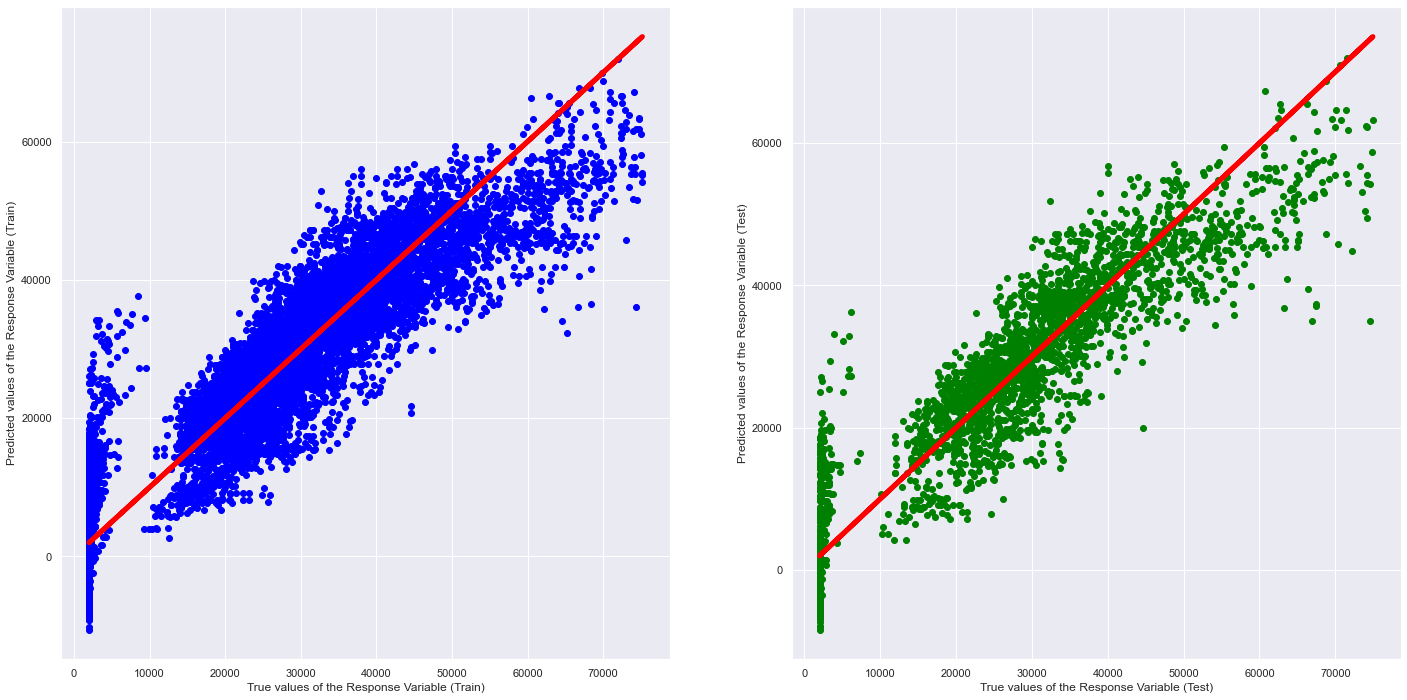

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.8031796430344718
Mean Squared Error (MSE) 	: 49820861.36910824

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.8037277264514101
Mean Squared Error (MSE) 	: 51232292.2388312



In [10]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Extract Response and Predictors
predictors = ['Year', 'Horsepower', 'Engine Cylinders', 'Number of Doors',
       'Brand_Acura', 'Brand_Alfa Romeo', 'Brand_Audi', 'Brand_BMW',
       'Brand_Buick', 'Brand_Cadillac', 'Brand_Chevrolet', 'Brand_Chrysler',
       'Brand_Dodge', 'Brand_FIAT', 'Brand_Ford', 'Brand_GMC', 'Brand_Genesis',
       'Brand_HUMMER', 'Brand_Honda', 'Brand_Hyundai', 'Brand_Infiniti',
       'Brand_Kia', 'Brand_Land Rover', 'Brand_Lexus', 'Brand_Lincoln',
       'Brand_Lotus', 'Brand_Maserati', 'Brand_Mazda', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Nissan', 'Brand_Oldsmobile',
       'Brand_Plymouth', 'Brand_Pontiac', 'Brand_Porsche', 'Brand_Saab',
       'Brand_Scion', 'Brand_Subaru', 'Brand_Suzuki', 'Brand_Toyota',
       'Brand_Volkswagen', 'Brand_Volvo']

y = pd.DataFrame(MLDATA['Price'])
X = pd.DataFrame(MLDATA[predictors])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, color = 'red', linewidth = 5)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, color = 'red', linewidth = 5)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()